<a href="https://colab.research.google.com/github/sardear/TorchNN/blob/main/TorchNN_VisKer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torchvision.models as models
import time
t_start = time.perf_counter()
model = models.resnet18(pretrained=True)
t_end = time.perf_counter()
print(type(model),"Loading time:", round((t_end-t_start),3),"sec.")
print(model)

w1 = model.conv1.weight
w2 = model.layer1[0].conv2.weight
print("=====================================================================")
print(w1,w1.shape)
print(w2,w2.shape)

<class 'torchvision.models.resnet.ResNet'> Loading time: 0.213 sec.
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine

In [22]:
import torch
import torch.nn as nn
import torchvision.models as models

model = models.resnet18()
weight_list = []

for name, module in model.named_modules():
  if isinstance(module, nn.Conv2d):
    print(name, module.weight.shape)
    weight_list.append(module.weight)

conv1 torch.Size([64, 3, 7, 7])
layer1.0.conv1 torch.Size([64, 64, 3, 3])
layer1.0.conv2 torch.Size([64, 64, 3, 3])
layer1.1.conv1 torch.Size([64, 64, 3, 3])
layer1.1.conv2 torch.Size([64, 64, 3, 3])
layer2.0.conv1 torch.Size([128, 64, 3, 3])
layer2.0.conv2 torch.Size([128, 128, 3, 3])
layer2.0.downsample.0 torch.Size([128, 64, 1, 1])
layer2.1.conv1 torch.Size([128, 128, 3, 3])
layer2.1.conv2 torch.Size([128, 128, 3, 3])
layer3.0.conv1 torch.Size([256, 128, 3, 3])
layer3.0.conv2 torch.Size([256, 256, 3, 3])
layer3.0.downsample.0 torch.Size([256, 128, 1, 1])
layer3.1.conv1 torch.Size([256, 256, 3, 3])
layer3.1.conv2 torch.Size([256, 256, 3, 3])
layer4.0.conv1 torch.Size([512, 256, 3, 3])
layer4.0.conv2 torch.Size([512, 512, 3, 3])
layer4.0.downsample.0 torch.Size([512, 256, 1, 1])
layer4.1.conv1 torch.Size([512, 512, 3, 3])
layer4.1.conv2 torch.Size([512, 512, 3, 3])


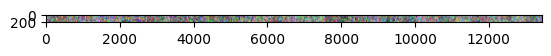

In [29]:
## show first layer kernel
import matplotlib.pyplot as plt
import numpy as np
import cv2
for i,weight in enumerate(weight_list[0]):
  #print("weight:",i,weight,weight.shape)
  weight_img = weight.detach().numpy()
  weight_img = np.moveaxis(weight_img,0,-1) #np.rollaxis(weight_img,1,-1)
  #print("weight:",i,weight_img,weight_img.shape)
  weight_img = cv2.normalize(weight_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
  scaled_weight_img = cv2.resize(weight_img, None, fx = 30, fy = 30)
  if i==0:
    hImg = scaled_weight_img.copy()
  else:
    hImg = np.hstack((hImg,scaled_weight_img))

# plt.imshow(cv2.cvtColor(hImg, cv2.COLOR_BGR2RGB))
plt.imshow(hImg)
plt.show()